#Tendencias de uso de energías sostenibles por país 
- ¿Cuáles son las tipos de energías que hay y qué países las ocupan?
- Top 10 países y que energías que se ocupan 
- Relación de acceso de electricidad VS GDP
- Acceso a la electricidad vs población
- Predicción de uso de energía sostenible
- Categorize regions for infrastructure development, understand sustainable energy's role.

#Emisión de CO2 por país BRICSM vs G7
- Porcentaje para cocinar de países
- Forecast CO2 emissions, support climate strategies.
- Evaluate policy impact de CO2 - Acuerdo de París
- Uso de energía fósil vs GDP
- Precio de energía eléctrica en el país
- Uso de carbono hacia energia renovable 

#Países que ocupan energía nuclear vs energia solar
- Analyze access, density, and growth for equitable distribution.
- Guide investors towards sustainable opportunities.
- Eficiencia de cada país de energia nuclear vs energia solar
- Consumo per cápita de electricidad nuclear vs población
- Consumo per cápita de electricidad solar vs población

#Ranking (top 5) de países de energía sostenible vs PIB per cápita
- Identify intensive areas for environmental impact reduction
- Identify regions for green investments based on capacity
- Consumo de electricidad vs crecimiento de PIB
- Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours
- Electricity generated from nuclear power in terawatt-hours

In [1]:
import requests
import pandas as pd

In [15]:
csv_reader="Copia de global-data-on-sustainable-energy (1).csv"
global_data=pd.read_csv(csv_reader)
global_df=pd.DataFrame(global_data)
global_df.dropna()
global_df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [18]:
energy_types=global_df.loc[:"Electricity from fossil fuels (TWh)","Electricity from nuclear (TWh)","Electricity from renewables (TWh)"]
energy_types


IndexingError: Too many indexers

In [4]:
#¿Cuáles son las tipos de energías que hay y qué países las ocupan?
relevant_columns=global_df.columns.tolist()
relevant_columns

['Entity',
 'Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density\\n(P/Km2)',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

In [8]:
# Creating a new DataFrame to filter and show the countries that use sustainable energies the most, using 'global_df' as the main DataFrame.

# Selecting relevant columns indicating sustainable energy usage
sustainable_energy_columns = [
    'Entity',  # Country
    'Year',  # Year
    'Access to clean fuels for cooking',  # Access to clean fuels for cooking
    'Renewable-electricity-generating-capacity-per-capita',  # Renewable electricity generating capacity per capita
    'Renewable energy share in the total final energy consumption (%)',  # Renewable energy share in total final energy consumption
    'Electricity from renewables (TWh)',  # Electricity from renewables
    'Low-carbon electricity (% electricity)'  # Low-carbon electricity
]

# Assuming 'global_df' includes all necessary columns
# Filtering for the new DataFrame with the relevant columns
filtered_global_df = global_df[sustainable_energy_columns].copy()

# Calculating medians for the key indicators to use as filters
medians = filtered_global_df[['Renewable-electricity-generating-capacity-per-capita', 'Renewable energy share in the total final energy consumption (%)']].median()

# Filtering countries that surpass both medians
highlighted_countries = filtered_global_df[
    (filtered_global_df['Renewable-electricity-generating-capacity-per-capita'] >= medians['Renewable-electricity-generating-capacity-per-capita']) &
    (filtered_global_df['Renewable energy share in the total final energy consumption (%)'] >= medians['Renewable energy share in the total final energy consumption (%)'])
]

# Showing the first records of the new filtered DataFrame and the calculated medians
highlighted_countries.head(), medians


(    Entity  Year  Access to clean fuels for cooking  \
 70  Angola  2007                               43.5   
 71  Angola  2008                               43.6   
 72  Angola  2009                               43.8   
 73  Angola  2010                               44.3   
 75  Angola  2012                               45.2   
 
     Renewable-electricity-generating-capacity-per-capita  \
 70                                              36.27      
 71                                              36.52      
 72                                              35.22      
 73                                              34.02      
 75                                              35.16      
 
     Renewable energy share in the total final energy consumption (%)  \
 70                                              58.49                  
 71                                              54.88                  
 72                                              52.41                  
 7

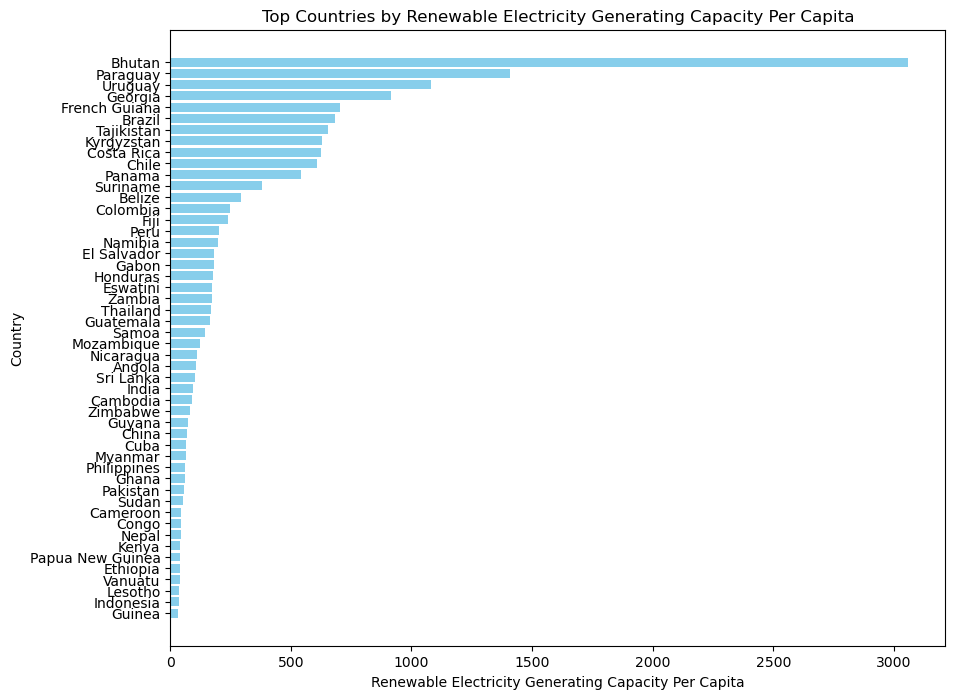

In [13]:
import matplotlib.pyplot as plt

# Asumiendo que 'highlighted_countries_sorted' es tu DataFrame filtrado y ordenado
# Ordena tu DataFrame si no lo has hecho aún
highlighted_countries_sorted = highlighted_countries.sort_values(by='Renewable-electricity-generating-capacity-per-capita', ascending=False)

# Preparando los datos para el gráfico
countries = highlighted_countries_sorted['Entity']
capacities = highlighted_countries_sorted['Renewable-electricity-generating-capacity-per-capita']

# Creando el gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(countries, capacities, color='skyblue')
plt.xlabel('Renewable Electricity Generating Capacity Per Capita')
plt.ylabel('Country')
plt.title('Top Countries by Renewable Electricity Generating Capacity Per Capita')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el mayor valor en la parte superior
plt.show()